In [ ]:
def checkStability(hospitalsPrefer, studentsPrefer, numbers, pairs):
    hospitalStudents = {h: [] for h in hospitalsPrefer}
    freeStudents = []                    

    for student, hospital in pairs.items():
        if hospital is None:
            freeStudents.append(student)
        else:
            hospitalStudents[hospital].append(student)

    for h, students in hospitalStudents.items():
        if len(students) > numbers.get(h, 0):
            return f"квота больницы {h} превышена"

    # Неустойчивость первого типа: свободный студент предпочтительнее занятого 
    for h, students in hospitalStudents.items():
        prefList = hospitalsPrefer[h]
        for s in students:
            for sFree in freeStudents:
                if sFree in prefList and prefList.index(sFree) < prefList.index(s):
                    return f"Неустойчивое (тип 1): больница {h} предпочитает свободного {sFree} своему студенту {s}"

    # Неустойчивость второго типа: взаимовыгодный обмен между двумя занятыми 
    studentHospital = pairs.copy()
    students = list(studentHospital.keys())

    for i in range(len(students)):
        s = students[i]
        h = studentHospital[s]
        if h is None:
            continue
        for j in range(i + 1, len(students)):
            s2 = students[j]
            h2 = studentHospital[s2]
            if h2 is None:
                continue

            if (h in hospitalsPrefer and s in hospitalsPrefer[h] and s2 in hospitalsPrefer[h] and
                    hospitalsPrefer[h].index(s2) < hospitalsPrefer[h].index(s)):
                if (s in studentsPrefer and h in studentsPrefer[s] and h2 in studentsPrefer[s] and
                        studentsPrefer[s].index(h) < studentsPrefer[s].index(h2)):
                    return f"Неустойчивое (тип 2): {s} в {h} и {s2} в {h2} хотят поменяться"

    return "Устойчивое"


def gale_shapley(hospitalsPrefer, studentsPrefer, numbers):
    freeStudents = list(studentsPrefer.keys())         
    proposals = {s: 0 for s in studentsPrefer}  
    hospitalAccepted = {h: [] for h in hospitalsPrefer} 

    while freeStudents:
        s = freeStudents.pop(0)          
        prefList = studentsPrefer[s]

        if proposals[s] >= len(prefList):
            continue

        h = prefList[proposals[s]]       
        proposals[s] += 1

        if h not in hospitalAccepted:
            freeStudents.append(s)
            continue

        accepted = hospitalAccepted[h]
        number = numbers.get(h, 0)

        if len(accepted) < number:
            accepted.append(s)
            accepted.sort(key=lambda x: hospitalsPrefer[h].index(x))
        else:
            worst = accepted[-1]          
            if hospitalsPrefer[h].index(s) < hospitalsPrefer[h].index(worst):
                accepted[-1] = s
                accepted.sort(key=lambda x: hospitalsPrefer[h].index(x))
                freeStudents.append(worst) 
            else:
                freeStudents.append(s)      

    pairs = {s: None for s in studentsPrefer}
    for h, students in hospitalAccepted.items():
        for s in students:
            pairs[s] = h

    return pairs, hospitalAccepted


In [ ]:
hospitalsPrefer = {
        "Больница A": ["Студент 1", "Студент 2", "Студент 3"],
        "Больница B": ["Студент 2", "Студент 3", "Студент 1"],
        "Больница C": ["Студент 3", "Студент 1", "Студент 2"]
    }

studentsPrefer = {
        "Студент 1": ["Больница A", "Больница B", "Больница C"],
        "Студент 2": ["Больница B", "Больница A", "Больница C"],
        "Студент 3": ["Больница C", "Больница A", "Больница B"]
    }

numbers = {"Больница A": 1, "Больница B": 1, "Больница C": 1} 

stable_assign, _ = gale_shapley(hospitalsPrefer, studentsPrefer, numbers)
print("Распределение (Гейл–Шепли):")
for s, h in stable_assign.items():
    print(f"{s} -> {h}")

print("\nПроверка устойчивости:")
print(checkStability(hospitalsPrefer, studentsPrefer, numbers, stable_assign))

Распределение (Гейл–Шепли):
Студент 1 -> Больница A
Студент 2 -> Больница B
Студент 3 -> Больница C

Проверка устойчивости:
Устойчивое


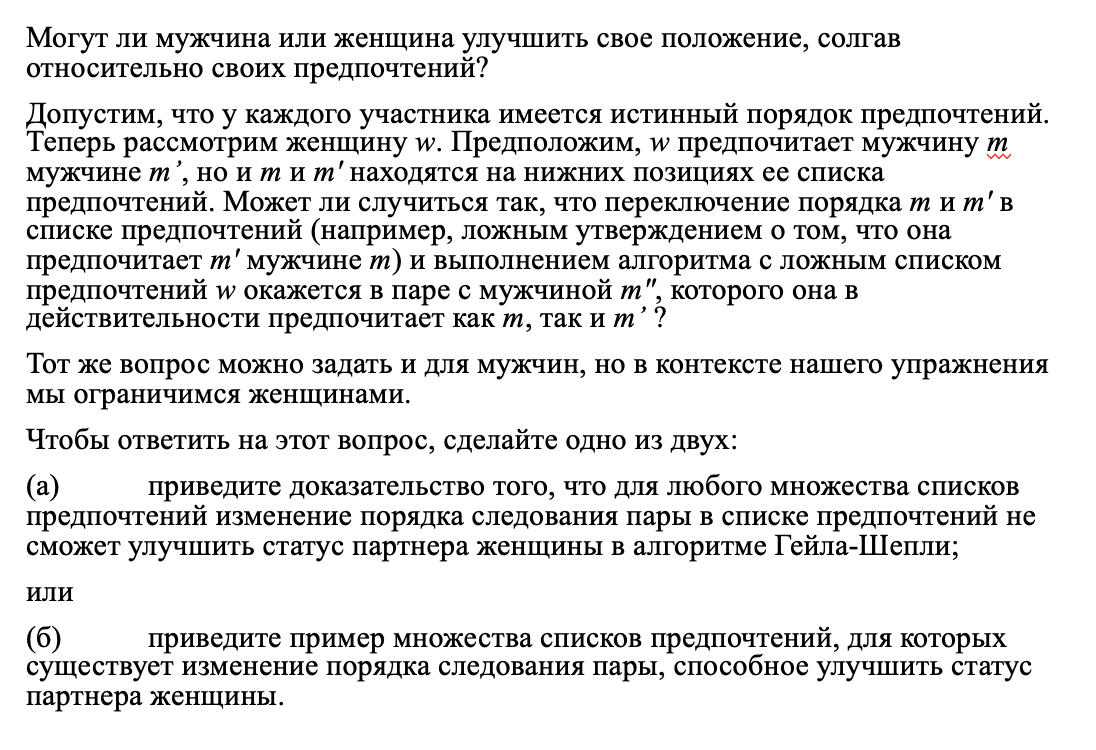

Существует пример, в котором женщина, изменив порядок двух мужчин в своем списке предпочтений, получает более предпочтительного партнера, чем при честном участии в алгоритме Гейла–Шепли (с предложениями от мужчин).

m1: w1>w2>w3  
m2: w2>w1>w3.   
m3: w1>w2>w3   

w1: m2>m1>m3  
w2: m1>m2>m3   
w3: m1>m2>m3   

По Гейла-Шепли:  
(m1, w1), (m2, w2), (m3, w3)  
Женщина w1 получает m1, хотя её истинный первый выбор — m2

Ложное поведение:  
w1: m2>m3>m1  
(m2, w1), (m1, w2), (m3, w3)